In [1]:
#Loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn.model_selection import train_test_split #for cross validation
from sklearn import neighbors #for knn
from sklearn.datasets import make_moons, make_circles, make_classification #importing the datasets



In [2]:
#set the figure parameters

h= 0.2 #step size in the mesh
figure = plt.figure()
#figure = plt.figure(figsize=(17, 9))

#KNN classifier
n_neighbors = 5 #try to set odd number of neighbours #change and see
classifiers = []
classifiers.append(neighbors.KNeighborsClassifier(n_neighbors, weights = 'uniform')) #here we are not setting any weight
classifiers.append(neighbors.KNeighborsClassifier(n_neighbors, weights = 'distance')) 
#here we are setting the distance as the weight

names = ['K_Neighbors_unweighted', 'K_Neighbors_weighted']



<Figure size 432x288 with 0 Axes>

In [3]:
#datasets
n_samples = 30
X, y = make_classification(n_samples, n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)

rng = np.random.RandomState(2)

X += 2*rng.uniform (size = X.shape)
linearly_separable = (X,y)

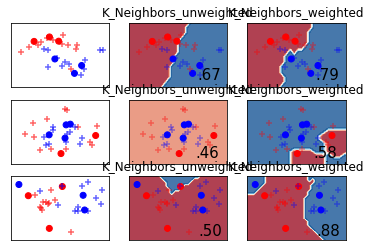

In [9]:
datasets = [make_moons(n_samples, noise=0.3, random_state=0),
            make_circles(n_samples,  noise=0.2, factor=0.5, random_state=1),
            linearly_separable]


i = 1
# iterate over datasets
for X, y in datasets:
    # preprocess dataset, split into training and test part
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8)  #split into train/test folds

    #set up meshgrid for figure
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], marker='+', c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], marker='+', c=y_test, cmap=cm_bright,
                   alpha=0.4)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.50, right=.70)
plt.show()